In [1]:
from Model.DCVAE import MobileNetVae
from Model.Utils import LoadMPS45,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np

/root/miniconda3/envs/tensorflow35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train1,x_test1=LoadMPS45(dirBase='DataSet/MPS-45.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [3]:
model = MobileNetVae(input_shape=(45,45,2),filters=[32,32,16],strides=[2,2,1],latent_dim=500,opt=RMSprop(lr=0.001),dropout=0.0)

In [4]:
model.fit(x_train, num_epochs=500,batch_size=64,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 23, 23, 64)   1152        input_1[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 23, 23, 64)   256         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 23, 23, 64)   0           Conv_BN[0][0]                    
_________________________________________________________________________________________

Train on 23997 samples, validate on 6000 samples


Epoch 1/500


23997/23997 [==============================] - 57s 2ms/step - loss: 925.4050 - acc_pred: 0.7831 - val_loss: 4954.8179 - val_acc_pred: 0.6845
Epoch 2/500


23997/23997 [==============================] - 41s 2ms/step - loss: 677.2101 - acc_pred: 0.8645 - val_loss: 4390.7440 - val_acc_pred: 0.7063
Epoch 3/500


23997/23997 [==============================] - 41s 2ms/step - loss: 598.0461 - acc_pred: 0.8858 - val_loss: 4069.8087 - val_acc_pred: 0.7159
Epoch 4/500


23997/23997 [==============================] - 41s 2ms/step - loss: 558.9799 - acc_pred: 0.8959 - val_loss: 4139.2261 - val_acc_pred: 0.7270
Epoch 5/500


23997/23997 [==============================] - 41s 2ms/step - loss: 540.0674 - acc_pred: 0.9004 - val_loss: 3855.7364 - val_acc_pred: 0.7463
Epoch 6/500


23997/23997 [==============================] - 41s 2ms/step - loss: 516.5616 - acc_pred: 0.9062 - val_loss: 3126.3262 - val_acc_pred: 0.7634
Epoch 7/500


23997/23997 [==============================] - 41s 2ms/step - loss: 496.3836 - acc_pred: 0.9108 - val_loss: 3213.3044 - val_acc_pred: 0.7749
Epoch 8/500


23997/23997 [==============================] - 41s 2ms/step - loss: 474.7231 - acc_pred: 0.9156 - val_loss: 3606.1290 - val_acc_pred: 0.7623
Epoch 9/500


23997/23997 [==============================] - 41s 2ms/step - loss: 456.4188 - acc_pred: 0.9192 - val_loss: 3708.7809 - val_acc_pred: 0.7674
Epoch 10/500


23997/23997 [==============================] - 41s 2ms/step - loss: 438.7736 - acc_pred: 0.9227 - val_loss: 2810.7990 - val_acc_pred: 0.7831
Epoch 11/500


23997/23997 [==============================] - 41s 2ms/step - loss: 422.6918 - acc_pred: 0.9255 - val_loss: 2566.8955 - val_acc_pred: 0.7986
Epoch 12/500


23997/23997 [==============================] - 41s 2ms/step - loss: 409.1192 - acc_pred: 0.9277 - val_loss: 2760.8241 - val_acc_pred: 0.7947
Epoch 13/500


23997/23997 [==============================] - 41s 2ms/step - loss: 393.8451 - acc_pred: 0.9305 - val_loss: 3489.5388 - val_acc_pred: 0.7767
Epoch 14/500


23997/23997 [==============================] - 41s 2ms/step - loss: 385.4472 - acc_pred: 0.9321 - val_loss: 2542.6602 - val_acc_pred: 0.8071
Epoch 15/500


23997/23997 [==============================] - 41s 2ms/step - loss: 375.8935 - acc_pred: 0.9338 - val_loss: 2116.7130 - val_acc_pred: 0.8216
Epoch 16/500


23997/23997 [==============================] - 41s 2ms/step - loss: 368.9108 - acc_pred: 0.9350 - val_loss: 1970.1732 - val_acc_pred: 0.8213
Epoch 17/500


23997/23997 [==============================] - 41s 2ms/step - loss: 360.6117 - acc_pred: 0.9366 - val_loss: 1977.0291 - val_acc_pred: 0.8354
Epoch 18/500


23997/23997 [==============================] - 41s 2ms/step - loss: 354.3065 - acc_pred: 0.9378 - val_loss: 1827.0303 - val_acc_pred: 0.8462
Epoch 19/500


23997/23997 [==============================] - 41s 2ms/step - loss: 349.3789 - acc_pred: 0.9387 - val_loss: 1585.5090 - val_acc_pred: 0.8504
Epoch 20/500


23997/23997 [==============================] - 41s 2ms/step - loss: 340.1215 - acc_pred: 0.9406 - val_loss: 1268.2052 - val_acc_pred: 0.8704
Epoch 21/500


23997/23997 [==============================] - 41s 2ms/step - loss: 336.4505 - acc_pred: 0.9413 - val_loss: 1048.9711 - val_acc_pred: 0.8829
Epoch 22/500


23997/23997 [==============================] - 41s 2ms/step - loss: 332.3255 - acc_pred: 0.9422 - val_loss: 980.6462 - val_acc_pred: 0.8907
Epoch 23/500


23997/23997 [==============================] - 41s 2ms/step - loss: 327.9361 - acc_pred: 0.9432 - val_loss: 920.9380 - val_acc_pred: 0.8985
Epoch 24/500


23997/23997 [==============================] - 41s 2ms/step - loss: 324.0192 - acc_pred: 0.9440 - val_loss: 780.6695 - val_acc_pred: 0.9040
Epoch 25/500


23997/23997 [==============================] - 41s 2ms/step - loss: 321.5311 - acc_pred: 0.9445 - val_loss: 742.8850 - val_acc_pred: 0.9097
Epoch 26/500


23997/23997 [==============================] - 41s 2ms/step - loss: 318.2161 - acc_pred: 0.9452 - val_loss: 731.4955 - val_acc_pred: 0.9096
Epoch 27/500


23997/23997 [==============================] - 41s 2ms/step - loss: 314.6536 - acc_pred: 0.9461 - val_loss: 685.7258 - val_acc_pred: 0.9140
Epoch 28/500


23997/23997 [==============================] - 41s 2ms/step - loss: 312.2661 - acc_pred: 0.9466 - val_loss: 621.9966 - val_acc_pred: 0.9197
Epoch 29/500


23997/23997 [==============================] - 41s 2ms/step - loss: 309.9786 - acc_pred: 0.9469 - val_loss: 579.2512 - val_acc_pred: 0.9238
Epoch 30/500


23997/23997 [==============================] - 41s 2ms/step - loss: 308.9258 - acc_pred: 0.9471 - val_loss: 510.0345 - val_acc_pred: 0.9271
Epoch 31/500


23997/23997 [==============================] - 41s 2ms/step - loss: 306.8442 - acc_pred: 0.9475 - val_loss: 597.8088 - val_acc_pred: 0.9199
Epoch 32/500


23997/23997 [==============================] - 41s 2ms/step - loss: 304.3221 - acc_pred: 0.9479 - val_loss: 524.0557 - val_acc_pred: 0.9262
Epoch 33/500


23997/23997 [==============================] - 41s 2ms/step - loss: 302.3292 - acc_pred: 0.9483 - val_loss: 581.8725 - val_acc_pred: 0.9201
Epoch 34/500


23997/23997 [==============================] - 41s 2ms/step - loss: 302.1235 - acc_pred: 0.9483 - val_loss: 533.1484 - val_acc_pred: 0.9238
Epoch 35/500


23997/23997 [==============================] - 41s 2ms/step - loss: 299.6723 - acc_pred: 0.9488 - val_loss: 493.0429 - val_acc_pred: 0.9277
Epoch 36/500


23997/23997 [==============================] - 41s 2ms/step - loss: 297.7548 - acc_pred: 0.9492 - val_loss: 524.7258 - val_acc_pred: 0.9244
Epoch 37/500


23997/23997 [==============================] - 41s 2ms/step - loss: 297.1312 - acc_pred: 0.9492 - val_loss: 458.8678 - val_acc_pred: 0.9314
Epoch 38/500


23997/23997 [==============================] - 41s 2ms/step - loss: 295.2466 - acc_pred: 0.9496 - val_loss: 479.4001 - val_acc_pred: 0.9281
Epoch 39/500


23997/23997 [==============================] - 41s 2ms/step - loss: 293.5355 - acc_pred: 0.9500 - val_loss: 406.4394 - val_acc_pred: 0.9372
Epoch 40/500


23997/23997 [==============================] - 41s 2ms/step - loss: 289.0176 - acc_pred: 0.9510 - val_loss: 378.6126 - val_acc_pred: 0.9390
Epoch 41/500


23997/23997 [==============================] - 41s 2ms/step - loss: 286.6226 - acc_pred: 0.9515 - val_loss: 360.7010 - val_acc_pred: 0.9417
Epoch 42/500


23997/23997 [==============================] - 41s 2ms/step - loss: 286.0439 - acc_pred: 0.9516 - val_loss: 341.1691 - val_acc_pred: 0.9442
Epoch 43/500


23997/23997 [==============================] - 41s 2ms/step - loss: 284.7493 - acc_pred: 0.9518 - val_loss: 344.7493 - val_acc_pred: 0.9447
Epoch 44/500


23997/23997 [==============================] - 41s 2ms/step - loss: 283.5838 - acc_pred: 0.9521 - val_loss: 329.8192 - val_acc_pred: 0.9460
Epoch 45/500


23997/23997 [==============================] - 41s 2ms/step - loss: 283.1296 - acc_pred: 0.9522 - val_loss: 340.1610 - val_acc_pred: 0.9448
Epoch 46/500


23997/23997 [==============================] - 41s 2ms/step - loss: 282.5591 - acc_pred: 0.9524 - val_loss: 316.0981 - val_acc_pred: 0.9487
Epoch 47/500


23997/23997 [==============================] - 41s 2ms/step - loss: 282.2644 - acc_pred: 0.9525 - val_loss: 320.6885 - val_acc_pred: 0.9482
Epoch 48/500


23997/23997 [==============================] - 41s 2ms/step - loss: 279.8603 - acc_pred: 0.9530 - val_loss: 325.4303 - val_acc_pred: 0.9481
Epoch 49/500


23997/23997 [==============================] - 41s 2ms/step - loss: 280.2566 - acc_pred: 0.9529 - val_loss: 317.9067 - val_acc_pred: 0.9487
Epoch 50/500


23997/23997 [==============================] - 41s 2ms/step - loss: 278.5942 - acc_pred: 0.9532 - val_loss: 326.8677 - val_acc_pred: 0.9463
Epoch 51/500


23997/23997 [==============================] - 41s 2ms/step - loss: 277.5354 - acc_pred: 0.9534 - val_loss: 326.0098 - val_acc_pred: 0.9478

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.0003200000210199505.
Epoch 52/500


23997/23997 [==============================] - 41s 2ms/step - loss: 271.3179 - acc_pred: 0.9548 - val_loss: 281.7731 - val_acc_pred: 0.9538
Epoch 53/500


23997/23997 [==============================] - 41s 2ms/step - loss: 270.0805 - acc_pred: 0.9551 - val_loss: 275.6279 - val_acc_pred: 0.9553
Epoch 54/500


23997/23997 [==============================] - 41s 2ms/step - loss: 268.8631 - acc_pred: 0.9554 - val_loss: 272.5286 - val_acc_pred: 0.9555
Epoch 55/500


23997/23997 [==============================] - 41s 2ms/step - loss: 269.3268 - acc_pred: 0.9553 - val_loss: 272.7965 - val_acc_pred: 0.9551
Epoch 56/500


23997/23997 [==============================] - 41s 2ms/step - loss: 268.6033 - acc_pred: 0.9554 - val_loss: 267.0235 - val_acc_pred: 0.9572
Epoch 57/500


23997/23997 [==============================] - 41s 2ms/step - loss: 267.9787 - acc_pred: 0.9556 - val_loss: 269.7596 - val_acc_pred: 0.9556
Epoch 58/500


23997/23997 [==============================] - 41s 2ms/step - loss: 267.2962 - acc_pred: 0.9557 - val_loss: 264.8804 - val_acc_pred: 0.9571
Epoch 59/500


23997/23997 [==============================] - 41s 2ms/step - loss: 267.5294 - acc_pred: 0.9557 - val_loss: 264.5835 - val_acc_pred: 0.9574
Epoch 60/500


23997/23997 [==============================] - 41s 2ms/step - loss: 264.6319 - acc_pred: 0.9563 - val_loss: 272.0167 - val_acc_pred: 0.9552
Epoch 61/500


23997/23997 [==============================] - 41s 2ms/step - loss: 264.4513 - acc_pred: 0.9564 - val_loss: 263.0854 - val_acc_pred: 0.9568
Epoch 62/500


23997/23997 [==============================] - 41s 2ms/step - loss: 265.5420 - acc_pred: 0.9562 - val_loss: 268.7620 - val_acc_pred: 0.9559
Epoch 63/500


23997/23997 [==============================] - 41s 2ms/step - loss: 263.9811 - acc_pred: 0.9565 - val_loss: 263.8262 - val_acc_pred: 0.9569
Epoch 64/500


23997/23997 [==============================] - 41s 2ms/step - loss: 263.3873 - acc_pred: 0.9566 - val_loss: 261.0729 - val_acc_pred: 0.9573
Epoch 65/500


23997/23997 [==============================] - 41s 2ms/step - loss: 264.1153 - acc_pred: 0.9564 - val_loss: 266.5706 - val_acc_pred: 0.9567
Epoch 66/500


23997/23997 [==============================] - 41s 2ms/step - loss: 263.5254 - acc_pred: 0.9566 - val_loss: 265.7106 - val_acc_pred: 0.9571
Epoch 67/500


23997/23997 [==============================] - 41s 2ms/step - loss: 263.1213 - acc_pred: 0.9567 - val_loss: 263.4613 - val_acc_pred: 0.9576
Epoch 68/500


23997/23997 [==============================] - 41s 2ms/step - loss: 262.8614 - acc_pred: 0.9568 - val_loss: 261.9381 - val_acc_pred: 0.9577
Epoch 69/500


23997/23997 [==============================] - 41s 2ms/step - loss: 262.7083 - acc_pred: 0.9568 - val_loss: 261.2491 - val_acc_pred: 0.9575

Epoch 00069: ReduceLROnPlateau reducing learning rate to 0.0001280000142287463.
Epoch 70/500


23997/23997 [==============================] - 41s 2ms/step - loss: 260.1474 - acc_pred: 0.9574 - val_loss: 259.5356 - val_acc_pred: 0.9583
Epoch 71/500


23997/23997 [==============================] - 41s 2ms/step - loss: 259.8523 - acc_pred: 0.9574 - val_loss: 258.5411 - val_acc_pred: 0.9582
Epoch 72/500


23997/23997 [==============================] - 41s 2ms/step - loss: 259.9635 - acc_pred: 0.9574 - val_loss: 257.8579 - val_acc_pred: 0.9580
Epoch 73/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.7945 - acc_pred: 0.9577 - val_loss: 257.1604 - val_acc_pred: 0.9582
Epoch 74/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.8424 - acc_pred: 0.9577 - val_loss: 257.0871 - val_acc_pred: 0.9585
Epoch 75/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.2169 - acc_pred: 0.9578 - val_loss: 258.1585 - val_acc_pred: 0.9580
Epoch 76/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.3947 - acc_pred: 0.9578 - val_loss: 256.6892 - val_acc_pred: 0.9589
Epoch 77/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.1095 - acc_pred: 0.9579 - val_loss: 251.0734 - val_acc_pred: 0.9597
Epoch 78/500


23997/23997 [==============================] - 41s 2ms/step - loss: 258.4402 - acc_pred: 0.9578 - val_loss: 253.0082 - val_acc_pred: 0.9591
Epoch 79/500


23997/23997 [==============================] - 41s 2ms/step - loss: 257.9030 - acc_pred: 0.9579 - val_loss: 260.6211 - val_acc_pred: 0.9580
Epoch 80/500


23997/23997 [==============================] - 41s 2ms/step - loss: 257.2672 - acc_pred: 0.9580 - val_loss: 252.9885 - val_acc_pred: 0.9596
Epoch 81/500


23997/23997 [==============================] - 41s 2ms/step - loss: 256.7883 - acc_pred: 0.9582 - val_loss: 252.0308 - val_acc_pred: 0.9599
Epoch 82/500


23997/23997 [==============================] - 41s 2ms/step - loss: 256.4749 - acc_pred: 0.9583 - val_loss: 255.9422 - val_acc_pred: 0.9589

Epoch 00082: ReduceLROnPlateau reducing learning rate to 5.1200004236306995e-05.
Epoch 83/500


23997/23997 [==============================] - 41s 2ms/step - loss: 256.3270 - acc_pred: 0.9583 - val_loss: 249.8256 - val_acc_pred: 0.9599
Epoch 84/500


23997/23997 [==============================] - 41s 2ms/step - loss: 256.2283 - acc_pred: 0.9583 - val_loss: 250.1850 - val_acc_pred: 0.9601
Epoch 85/500


23997/23997 [==============================] - 41s 2ms/step - loss: 255.8331 - acc_pred: 0.9584 - val_loss: 250.1183 - val_acc_pred: 0.9600
Epoch 86/500


23997/23997 [==============================] - 41s 2ms/step - loss: 255.3685 - acc_pred: 0.9585 - val_loss: 248.1047 - val_acc_pred: 0.9601
Epoch 87/500


23997/23997 [==============================] - 41s 2ms/step - loss: 255.7427 - acc_pred: 0.9584 - val_loss: 247.9677 - val_acc_pred: 0.9600
Epoch 88/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.4390 - acc_pred: 0.9587 - val_loss: 247.2992 - val_acc_pred: 0.9603
Epoch 89/500


23997/23997 [==============================] - 41s 2ms/step - loss: 255.6141 - acc_pred: 0.9585 - val_loss: 248.6591 - val_acc_pred: 0.9601
Epoch 90/500


23997/23997 [==============================] - 41s 2ms/step - loss: 255.7933 - acc_pred: 0.9584 - val_loss: 247.7159 - val_acc_pred: 0.9605
Epoch 91/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.8220 - acc_pred: 0.9586 - val_loss: 246.9431 - val_acc_pred: 0.9607
Epoch 92/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.8782 - acc_pred: 0.9586 - val_loss: 246.7713 - val_acc_pred: 0.9607
Epoch 93/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.1233 - acc_pred: 0.9588 - val_loss: 246.8152 - val_acc_pred: 0.9608
Epoch 94/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.8482 - acc_pred: 0.9586 - val_loss: 247.1156 - val_acc_pred: 0.9606
Epoch 95/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.7758 - acc_pred: 0.9587 - val_loss: 247.2381 - val_acc_pred: 0.9606
Epoch 96/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.4005 - acc_pred: 0.9587 - val_loss: 247.0912 - val_acc_pred: 0.9606
Epoch 97/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.5548 - acc_pred: 0.9587 - val_loss: 246.3744 - val_acc_pred: 0.9609
Epoch 98/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.8119 - acc_pred: 0.9586 - val_loss: 247.1680 - val_acc_pred: 0.9606
Epoch 99/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.5822 - acc_pred: 0.9587 - val_loss: 248.0045 - val_acc_pred: 0.9606
Epoch 100/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.6456 - acc_pred: 0.9589 - val_loss: 246.8169 - val_acc_pred: 0.9607
Epoch 101/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.7901 - acc_pred: 0.9589 - val_loss: 247.3238 - val_acc_pred: 0.9604
Epoch 102/500


23997/23997 [==============================] - 41s 2ms/step - loss: 254.1378 - acc_pred: 0.9588 - val_loss: 246.6350 - val_acc_pred: 0.9608

Epoch 00102: ReduceLROnPlateau reducing learning rate to 2.0480001694522798e-05.
Epoch 103/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.5560 - acc_pred: 0.9589 - val_loss: 244.9944 - val_acc_pred: 0.9611
Epoch 104/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.5186 - acc_pred: 0.9590 - val_loss: 244.7584 - val_acc_pred: 0.9611
Epoch 105/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.5223 - acc_pred: 0.9590 - val_loss: 244.5602 - val_acc_pred: 0.9612
Epoch 106/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.0188 - acc_pred: 0.9591 - val_loss: 244.6179 - val_acc_pred: 0.9610
Epoch 107/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.8527 - acc_pred: 0.9591 - val_loss: 244.3805 - val_acc_pred: 0.9611
Epoch 108/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.0976 - acc_pred: 0.9590 - val_loss: 244.1883 - val_acc_pred: 0.9612
Epoch 109/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.7321 - acc_pred: 0.9589 - val_loss: 244.2547 - val_acc_pred: 0.9613
Epoch 110/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.6942 - acc_pred: 0.9592 - val_loss: 244.2443 - val_acc_pred: 0.9612
Epoch 111/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.9566 - acc_pred: 0.9591 - val_loss: 243.9544 - val_acc_pred: 0.9612
Epoch 112/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.5534 - acc_pred: 0.9592 - val_loss: 244.2080 - val_acc_pred: 0.9611
Epoch 113/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.1296 - acc_pred: 0.9591 - val_loss: 244.4196 - val_acc_pred: 0.9612
Epoch 114/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.7872 - acc_pred: 0.9591 - val_loss: 243.7674 - val_acc_pred: 0.9613
Epoch 115/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.7092 - acc_pred: 0.9592 - val_loss: 244.2755 - val_acc_pred: 0.9611
Epoch 116/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.2823 - acc_pred: 0.9591 - val_loss: 244.1235 - val_acc_pred: 0.9612
Epoch 117/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.7103 - acc_pred: 0.9592 - val_loss: 244.0690 - val_acc_pred: 0.9613
Epoch 118/500


23997/23997 [==============================] - 41s 2ms/step - loss: 253.1693 - acc_pred: 0.9591 - val_loss: 244.1431 - val_acc_pred: 0.9613
Epoch 119/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.8689 - acc_pred: 0.9591 - val_loss: 244.1688 - val_acc_pred: 0.9612

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.
Epoch 120/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.5848 - acc_pred: 0.9592 - val_loss: 243.8883 - val_acc_pred: 0.9613
Epoch 121/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.6403 - acc_pred: 0.9592 - val_loss: 243.7728 - val_acc_pred: 0.9613
Epoch 122/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.4019 - acc_pred: 0.9592 - val_loss: 243.6126 - val_acc_pred: 0.9613
Epoch 123/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.8888 - acc_pred: 0.9591 - val_loss: 243.5273 - val_acc_pred: 0.9612
Epoch 124/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.3026 - acc_pred: 0.9592 - val_loss: 243.6916 - val_acc_pred: 0.9613
Epoch 125/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.2848 - acc_pred: 0.9593 - val_loss: 243.4099 - val_acc_pred: 0.9613
Epoch 126/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.3863 - acc_pred: 0.9592 - val_loss: 243.2595 - val_acc_pred: 0.9613
Epoch 127/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.3519 - acc_pred: 0.9593 - val_loss: 243.1994 - val_acc_pred: 0.9614
Epoch 128/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.9444 - acc_pred: 0.9593 - val_loss: 243.4665 - val_acc_pred: 0.9612
Epoch 129/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.2975 - acc_pred: 0.9593 - val_loss: 243.5510 - val_acc_pred: 0.9613
Epoch 130/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.1452 - acc_pred: 0.9593 - val_loss: 243.3970 - val_acc_pred: 0.9613
Epoch 131/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.8336 - acc_pred: 0.9594 - val_loss: 243.1478 - val_acc_pred: 0.9614
Epoch 132/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.7242 - acc_pred: 0.9592 - val_loss: 243.5141 - val_acc_pred: 0.9613
Epoch 133/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.4057 - acc_pred: 0.9592 - val_loss: 243.2584 - val_acc_pred: 0.9614
Epoch 134/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.4680 - acc_pred: 0.9592 - val_loss: 243.0766 - val_acc_pred: 0.9614
Epoch 135/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.2895 - acc_pred: 0.9592 - val_loss: 243.3794 - val_acc_pred: 0.9614
Epoch 136/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.2904 - acc_pred: 0.9593 - val_loss: 243.3950 - val_acc_pred: 0.9614
Epoch 137/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.4860 - acc_pred: 0.9592 - val_loss: 243.4093 - val_acc_pred: 0.9613
Epoch 138/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.1354 - acc_pred: 0.9593 - val_loss: 243.2148 - val_acc_pred: 0.9614
Epoch 139/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.8175 - acc_pred: 0.9592 - val_loss: 243.3790 - val_acc_pred: 0.9613

Epoch 00139: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.
Epoch 140/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.5697 - acc_pred: 0.9594 - val_loss: 242.8699 - val_acc_pred: 0.9615
Epoch 141/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.1175 - acc_pred: 0.9593 - val_loss: 243.1566 - val_acc_pred: 0.9614
Epoch 142/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.3212 - acc_pred: 0.9592 - val_loss: 242.9810 - val_acc_pred: 0.9614
Epoch 143/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.6788 - acc_pred: 0.9592 - val_loss: 243.1105 - val_acc_pred: 0.9614
Epoch 144/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.7671 - acc_pred: 0.9594 - val_loss: 243.1308 - val_acc_pred: 0.9614
Epoch 145/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.9272 - acc_pred: 0.9593 - val_loss: 242.7623 - val_acc_pred: 0.9615
Epoch 146/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.9269 - acc_pred: 0.9593 - val_loss: 243.1256 - val_acc_pred: 0.9615
Epoch 147/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.6580 - acc_pred: 0.9594 - val_loss: 242.9822 - val_acc_pred: 0.9614
Epoch 148/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.7486 - acc_pred: 0.9594 - val_loss: 243.0232 - val_acc_pred: 0.9614
Epoch 149/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.4251 - acc_pred: 0.9592 - val_loss: 242.8723 - val_acc_pred: 0.9614
Epoch 150/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.1968 - acc_pred: 0.9593 - val_loss: 242.9453 - val_acc_pred: 0.9614

Epoch 00150: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.
Epoch 151/500


23997/23997 [==============================] - 41s 2ms/step - loss: 251.8799 - acc_pred: 0.9594 - val_loss: 242.8808 - val_acc_pred: 0.9615
Epoch 152/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.0512 - acc_pred: 0.9593 - val_loss: 242.9790 - val_acc_pred: 0.9614
Epoch 153/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.2074 - acc_pred: 0.9593 - val_loss: 243.0951 - val_acc_pred: 0.9614
Epoch 154/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.1206 - acc_pred: 0.9593 - val_loss: 243.1211 - val_acc_pred: 0.9614
Epoch 155/500


23997/23997 [==============================] - 41s 2ms/step - loss: 252.3072 - acc_pred: 0.9593 - val_loss: 242.9249 - val_acc_pred: 0.9614

Epoch 00155: ReduceLROnPlateau reducing learning rate to 8.192000677809119e-07.



val_loss   :  [242.88083972167968, 242.97902876790366, 243.0951132405599, 243.12110786946616]
loss   :  [251.87987163976246, 252.051224072814, 252.20741157453844, 252.12061928349564]


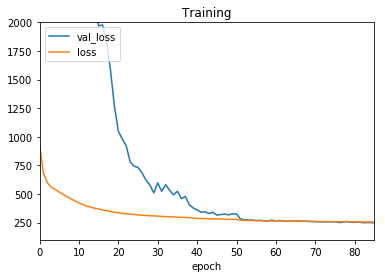

In [5]:
PlotHistory(model.history.history,listKeys=['val_loss','loss'],axis_=[0,85,100,2000]) 

lr   :  [1.6384001e-06, 1.6384001e-06, 1.6384001e-06, 1.6384001e-06]


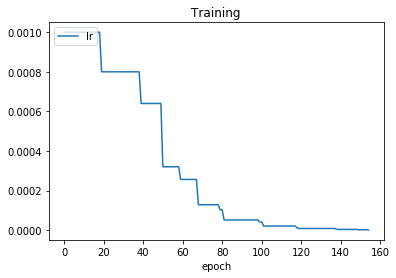

In [6]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.9614837034543355, 0.9614287260373433, 0.9614066654841105, 0.9613803313573202]
acc_pred   :  [0.9593646543201926, 0.9593243600453129, 0.9592822556590649, 0.9592933080770346]


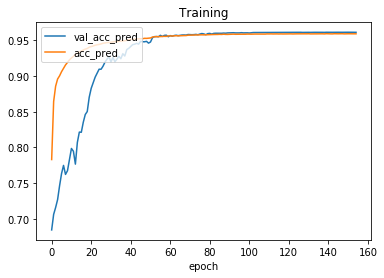

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

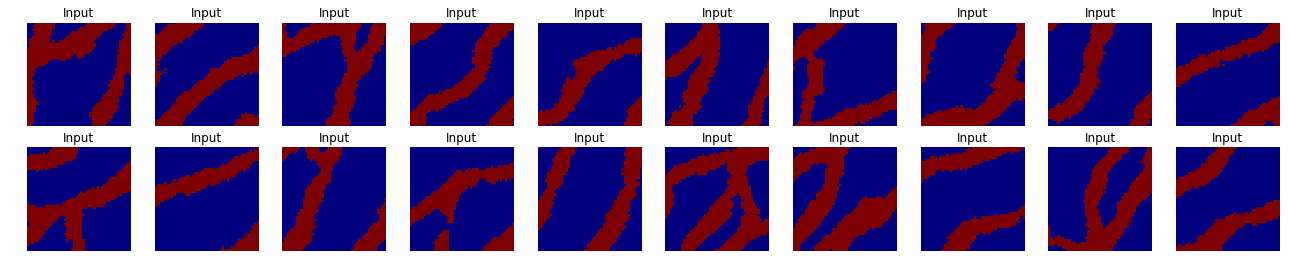

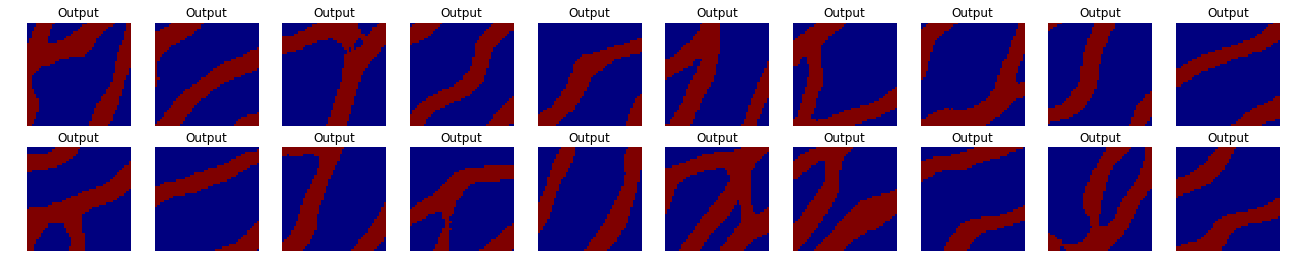

In [8]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=45)

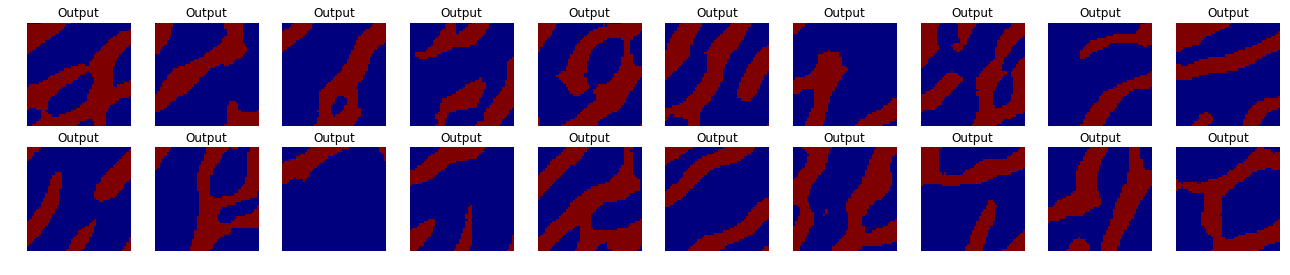

In [9]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=45,Only_Result=False)